In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Goal: 
- Predict median house value based on housing features

**This is a self-learning project.**

**I am trying to create a generalized model over the California Housing Prices data set.**

In [3]:
housing = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


comment:

> total_bedroom has only 20,433 non-null values

### Explore all the possible missing values

In [6]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Explore the data types of each column 

In [7]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### Explore the value_counts of each data type

In [8]:
housing.dtypes.value_counts()

float64    9
object     1
dtype: int64

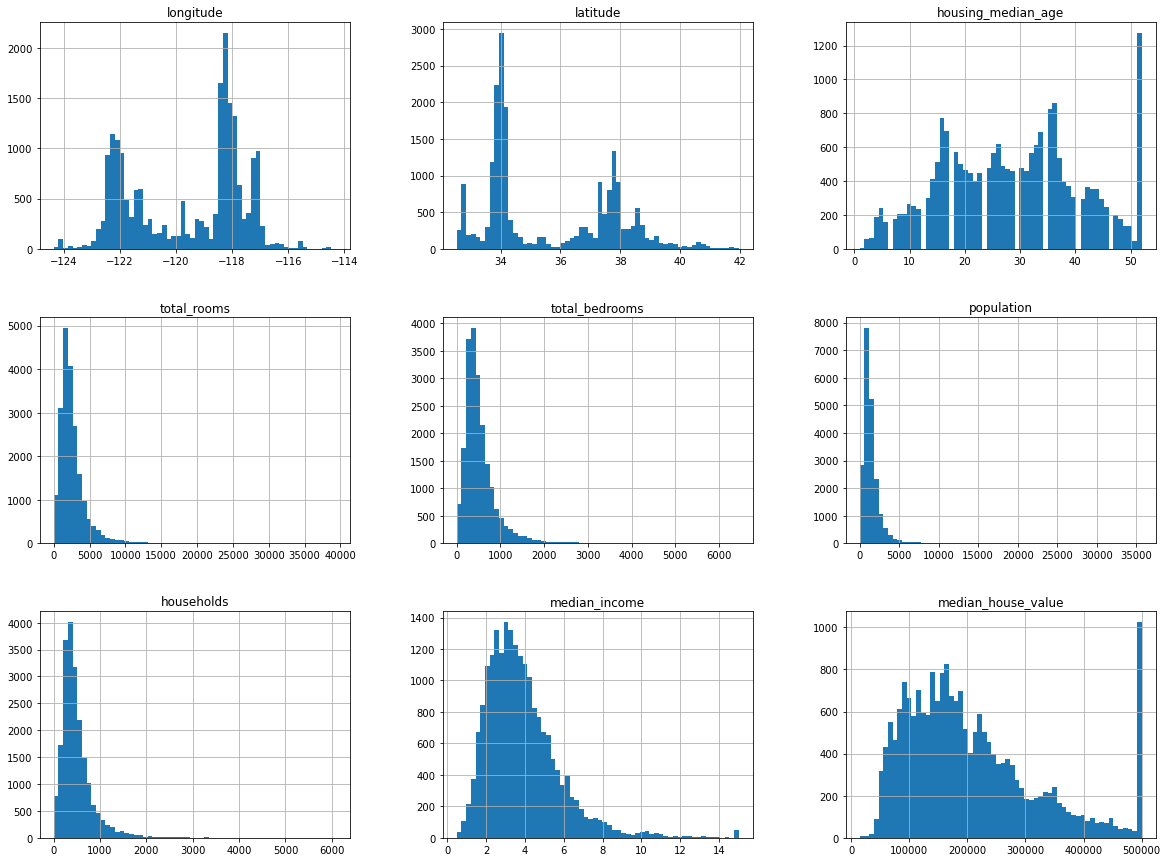

In [9]:
housing.hist(bins=60, figsize=(20, 15))
plt.show()

### Split train and test dataset

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(housing, test_size=0.2, random_state=40)

### Create an income category

so we can see a better representation ...

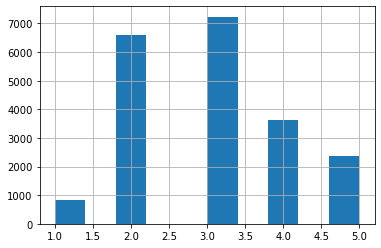

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

### Apply stratified sampling based on income category

Stratified sampling is used to highlight differences among groups in a population

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
for i, (train_index, test_index) in enumerate(sss.split(housing, housing['income_cat'])):
    strat_train_data = housing.loc[train_index]
    strat_test_data = housing.loc[test_index]


In [13]:
strat_test_data['income_cat'].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [14]:
strat_test_data['income_cat'].value_counts() / len(strat_test_data)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [15]:
for dataset in (strat_train_data, strat_test_data):
    dataset.drop('income_cat', axis=1, inplace=True)

### Visualize the data

In [16]:
housing = strat_train_data.copy()

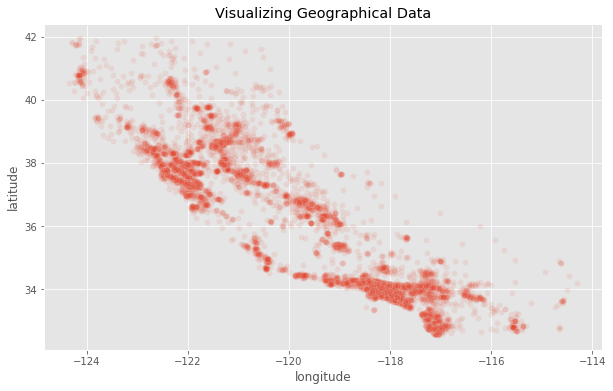

In [17]:
style.use('ggplot')
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x="longitude", y="latitude", alpha=0.1)
plt.title("Visualizing Geographical Data")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

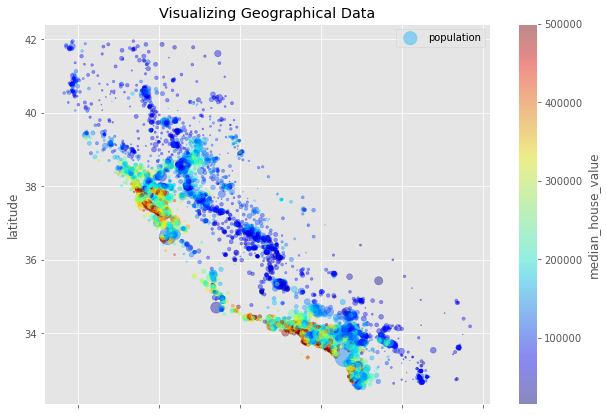

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10, 7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.title("Visualizing Geographical Data")
plt.show()

comment 
> we can see that house_value is strongly correlated to: 

    - location (whether if it's closer to the ocean), and
    - population (denser area)

### Find correlations with .corr()

In [19]:
corr_matrix = housing.corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925744,-0.103618,0.041015,0.066820,0.096875,0.052258,-0.020808,-0.051167
latitude,-0.925744,1.000000,0.006480,-0.032324,-0.064705,-0.106290,-0.068554,-0.072867,-0.137691
housing_median_age,-0.103618,0.006480,1.000000,-0.361585,-0.320116,-0.291642,-0.302235,-0.122442,0.105329
total_rooms,0.041015,-0.032324,-0.361585,1.000000,0.929260,0.854717,0.917051,0.200334,0.138007
total_bedrooms,0.066820,-0.064705,-0.320116,0.929260,1.000000,0.875837,0.979742,-0.008368,0.052814
population,0.096875,-0.106290,-0.291642,0.854717,0.875837,1.000000,0.905437,0.005458,-0.021544
households,0.052258,-0.068554,-0.302235,0.917051,0.979742,0.905437,1.000000,0.013639,0.070014
median_income,-0.020808,-0.072867,-0.122442,0.200334,-0.008368,0.005458,0.013639,1.000000,0.686865
median_house_value,-0.051167,-0.137691,0.105329,0.138007,0.052814,-0.021544,0.070014,0.686865,1.000000


### Specifically i want to see how each feature is correlated to median_house_value

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686865
total_rooms           0.138007
housing_median_age    0.105329
households            0.070014
total_bedrooms        0.052814
population           -0.021544
longitude            -0.051167
latitude             -0.137691
Name: median_house_value, dtype: float64

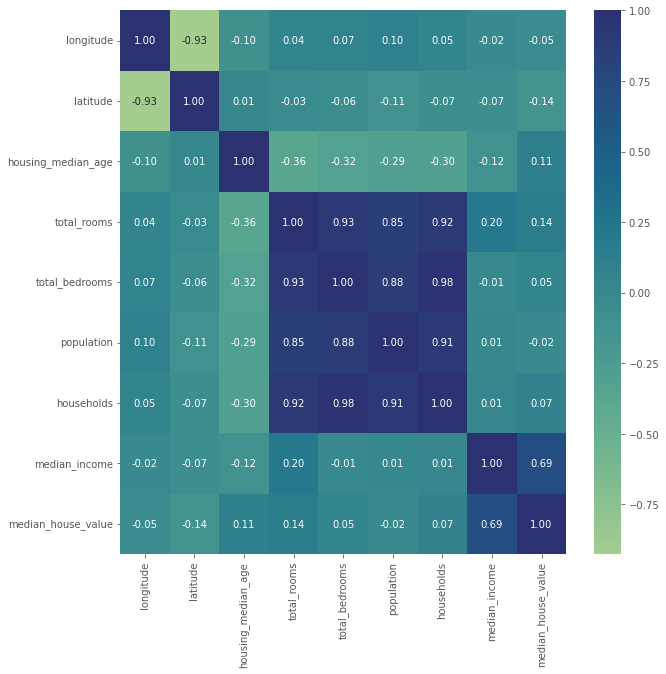

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix ,cbar='True', annot = True, cmap='crest', fmt='.2f')
plt.show()

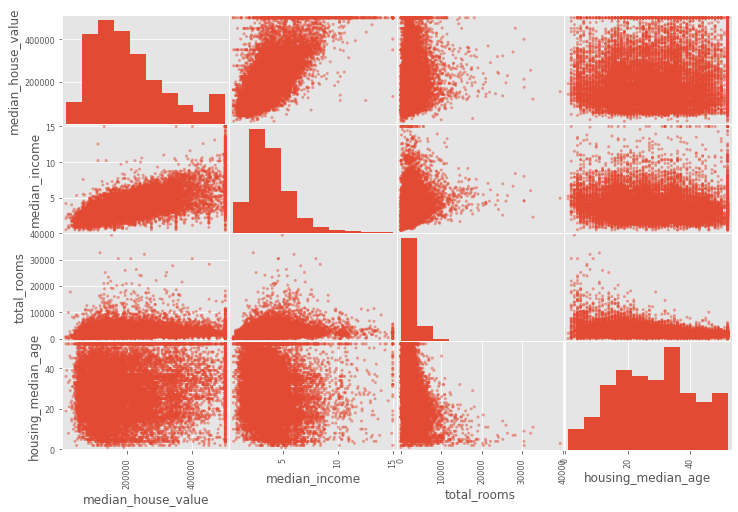

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

comment 
> we can see median_income and median_house_value have strong correlation, and the points are not as scatter as other plots

### Expore more into these features

In [23]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [24]:
housing['Addedrooms_per_household'] = housing["total_rooms"] / housing["households"]
housing['Addedbedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['Addedbedrooms_per_household'] = housing["total_bedrooms"] / housing['households']
housing['Addedmedian_income_per_household'] = housing['median_income'] / housing['households']
housing['AddedPopulation_per_household'] = housing['population'] / housing['households']

In [25]:
# new correlation
corr_matrix_more = housing.corr()
corr_matrix_more

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Addedrooms_per_household,Addedbedrooms_per_room,Addedbedrooms_per_household,Addedmedian_income_per_household,AddedPopulation_per_household
longitude,1.000000,-0.925744,-0.103618,0.041015,0.066820,0.096875,0.052258,-0.020808,-0.051167,-0.030807,0.094602,0.014881,-0.022937,0.000886
latitude,-0.925744,1.000000,0.006480,-0.032324,-0.064705,-0.106290,-0.068554,-0.072867,-0.137691,0.109971,-0.116960,0.066909,0.019037,0.006761
housing_median_age,-0.103618,0.006480,1.000000,-0.361585,-0.320116,-0.291642,-0.302235,-0.122442,0.105329,-0.165852,0.138425,-0.081287,0.019360,0.013395
total_rooms,0.041015,-0.032324,-0.361585,1.000000,0.929260,0.854717,0.917051,0.200334,0.138007,0.145231,-0.188958,0.030754,-0.131574,-0.022800
total_bedrooms,0.066820,-0.064705,-0.320116,0.929260,1.000000,0.875837,0.979742,-0.008368,0.052814,0.000790,0.086103,0.048505,-0.154776,-0.026350
population,0.096875,-0.106290,-0.291642,0.854717,0.875837,1.000000,0.905437,0.005458,-0.021544,-0.071941,0.038466,-0.062890,-0.134682,0.065141
households,0.052258,-0.068554,-0.302235,0.917051,0.979742,0.905437,1.000000,0.013639,0.070014,-0.081263,0.067371,-0.051325,-0.159761,-0.025443
median_income,-0.020808,-0.072867,-0.122442,0.200334,-0.008368,0.005458,0.013639,1.000000,0.686865,0.357271,-0.614859,-0.062775,0.197678,0.022455
median_house_value,-0.051167,-0.137691,0.105329,0.138007,0.052814,-0.021544,0.070014,0.686865,1.000000,0.159500,-0.255178,-0.053844,0.079608,-0.027110
Addedrooms_per_household,-0.030807,0.109971,-0.165852,0.145231,0.000790,-0.071941,-0.081263,0.357271,0.159500,1.000000,-0.448916,0.825540,0.138701,-0.009547


### We can see how the new features correlate to median_house_value

In [26]:
corr_matrix_more['median_house_value'].sort_values(ascending=False)

median_house_value                  1.000000
median_income                       0.686865
Addedrooms_per_household            0.159500
total_rooms                         0.138007
housing_median_age                  0.105329
Addedmedian_income_per_household    0.079608
households                          0.070014
total_bedrooms                      0.052814
population                         -0.021544
AddedPopulation_per_household      -0.027110
longitude                          -0.051167
Addedbedrooms_per_household        -0.053844
latitude                           -0.137691
Addedbedrooms_per_room             -0.255178
Name: median_house_value, dtype: float64

### breakdown the features to: strong correlation, moderate correlation, weak correlation, and negligible correlated

In [27]:
corr_median_house_value = corr_matrix_more['median_house_value']
strong_corr = list(corr_median_house_value[(abs(corr_median_house_value) >= 0.6) & (corr_median_house_value < 1)].index)
moderate_corr = list(corr_median_house_value[(abs(corr_median_house_value) < 0.6) & (abs(corr_median_house_value) >= 0.4)].index)
weak_corr = list(corr_median_house_value[(abs(corr_median_house_value) < 0.4) & (abs(corr_median_house_value) >= 0.1)].index)
nelig_corr = list(corr_median_house_value[(abs(corr_median_house_value) < 0.1)].index)

print(f"strong_correlate (0.6~1) to median_house_value:\n{strong_corr}\n")
print(f"moderate_correlate (0.4~0.6)to median_house_value:\n{moderate_corr}\n")
print(f"weak_correlate (0.1~0.4) to median_house_value:\n{weak_corr}\n")
print(f"negligible_correlate (< 0.1) to median_house_value:\n{nelig_corr}\n")

strong_correlate (0.6~1) to median_house_value:
['median_income']

moderate_correlate (0.4~0.6)to median_house_value:
[]

weak_correlate (0.1~0.4) to median_house_value:
['latitude', 'housing_median_age', 'total_rooms', 'Addedrooms_per_household', 'Addedbedrooms_per_room']

negligible_correlate (< 0.1) to median_house_value:
['longitude', 'total_bedrooms', 'population', 'households', 'Addedbedrooms_per_household', 'Addedmedian_income_per_household', 'AddedPopulation_per_household']



comment 
> added features : '**Addedrooms_per_household**' and '**Addedbedrooms_per_room**' seem to have higher correlation to housing_median_value than some of the original features

### Separate the feature and target

In [28]:
housing_features = strat_train_data.drop("median_house_value", axis=1)
housing_labels = strat_train_data["median_house_value"].copy()

### Data cleaning

we can see that 'total_bedrooms' has 168 missing values

In [29]:
housing_features.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

#### we can use SimpleImputer with strategy='median'

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing_features.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)

housing_train = pd.DataFrame(X, columns=housing_num.columns,
                             index=housing_num.index)

### check for missing values again

In [31]:
housing_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Now we need to deal with the categorical feature: ocean_proximity

In [32]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[['ocean_proximity']]
cat_encoder = OneHotEncoder()
housing_cat_ohe = cat_encoder.fit_transform(housing_cat)
housing_cat_ohe


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### we can look at the categories from OneHotEncoder

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### we can convert sparse matrix of `housing_one_ohe` to np.array

In [34]:
housing_cat_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### custom transformer

i'm here writing a class to include the two added features, namely:

- Addedbedroom_per_household,
- Addedbedroom_per_room

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, households_idx = 3, 4, 6

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room: bool = True):
        super().__init__()
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household]

attr_adder = AttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


### Pipeline

Here we should use the sklearn pipeline to ensure smooth flow of the data before they are sent to the ML models. And to assemble several steps that can be cross-validated together while setting different parameters.

"The key benefit of building a pipeline is improved readability. Pipelines are able to execute a series of transformations with one call, allowing users to attain results with less code"

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', AttributesAdder()),
    ('std_scaler', StandardScaler()) # the last transform must be an estimator
])


housing_num_tr = num_pipeline.fit_transform(housing_num)


### We can also use ColumnTransformer

ColumnTransformer can pack the preprocessing steps more neatly 

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # (name: str, transformer: transformer, columns: str, array, slice, callable)
    ("cat", OneHotEncoder(), cat_attribs)
], verbose=True)

housing_prepared = full_pipeline.fit_transform(housing)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


comment 
> the data is now ready to be fed into a ML model

### Linear Regression model

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

### Examine with some sample data

In [39]:
"""Examine with some sample data"""
num_sample = 10
sample_data = housing.iloc[:num_sample]
sample_labels = housing_labels.iloc[:num_sample]
sample_data_prepared = full_pipeline.transform(sample_data)

print(f"Predicted Housing_values: {lin_reg.predict(sample_data_prepared)}")
print(" ")
print(f"Labels(actual Housing_values): {list(sample_labels)}")

Predicted Housing_values: [145051.40301405 192105.39332575 201227.77399777 135562.74505967
 127865.48317976 173477.48019252 162982.14326733 213000.73789616
 208460.31976076 140064.214366  ]
 
Labels(actual Housing_values): [158300.0, 253900.0, 209000.0, 137500.0, 93800.0, 169700.0, 153900.0, 110800.0, 211300.0, 84200.0]


### Evaluate the results with MSE and RMSE

In [40]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared) # housing_prepared is the preprocessed training data

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'RMSE is: {lin_rmse:.3f}')

RMSE is: 68201.739


### Lets try a DecisionTreeRegressor()

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housings_predictions = tree_reg.predict(housing_prepared)
tree_reg_mse = mean_squared_error(housing_labels, housings_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
print(f'RMSE is: {tree_reg_rmse:.3f}')

RMSE is: 0.000


comment 
> something is strange

### Lets try a RandomForestRegressor()

In [42]:
"""RandomForestRegressor"""
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housings_predictions = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_labels, housings_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
print(f'RMSE is: {forest_reg_rmse:.3f}')

RMSE is: 18257.459


### Use k-fold cross validation to evaluate the models

In [43]:
def display_kfold_scores(scores: np.ndarray):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())
    
    
from sklearn.model_selection import cross_val_score

"""Evaluate the linear regression model"""
lin_reg_kfold_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error',  #
                         cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_kfold_scores)
print("From the Linear Regression model:\n")
display_kfold_scores(lin_reg_rmse_scores)

print("="*30+ "\n")
"""Evaluate the DecisionTreeRegressor model"""
trees_kfold_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error',  #
                         cv=10)
# negative because all scorer objects follow the conventiob that higher retuern value are better
# than lower return values. So metrics like MAE (which is to minimize) need a negative in front
# to maintain the function's behaviour
tree_rmse_scores = np.sqrt(-trees_kfold_scores)
print("From the DecisionTreeRegressor model:\n")
display_kfold_scores(tree_rmse_scores)


print("="*30+ "\n")
"""Evaluate the RandomForestRegressor model"""
forest_reg_kfold_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error',  #
                         cv=10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_kfold_scores)
print("From the RandomForestRegressor model:\n")
display_kfold_scores(forest_reg_rmse_scores)


From the Linear Regression model:

Scores:  [68822.29668361 69593.74372917 63297.13203618 70030.95313472
 69158.09390191 68987.30490944 68360.0959638  68367.69550142
 69642.68981363 68907.11120121]
Mean:  68516.71168750696
Std:  1813.5633724956233

From the DecisionTreeRegressor model:

Scores:  [70742.17280118 72510.28669391 60975.28705471 70007.2252127
 72469.71781077 70400.58108599 69107.13373659 72573.7364318
 70370.16397768 71837.33879979]
Mean:  70099.36436051378
Std:  3246.432793562658

From the RandomForestRegressor model:

Scores:  [49869.55129854 50270.69224082 44432.67021334 49599.96053126
 50270.40133914 51377.06951425 49099.24438958 50414.82150526
 47921.77860543 48991.16259695]
Mean:  49224.73522345615
Std:  1830.9768130238522


#### comment 

From the above results, we can see that:
- RandomForestRegressor has the least mean RMSE: 49,230 and the least std RMSE: 1899.6 

### Tuning hyperparameters of RandomForestRegressor() with GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, verbose=3)

grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=2, n_estimators=3;, score=(train=-1162346415.930, test=-4372937823.187) total time=   0.1s
[CV 2/5] END max_features=2, n_estimators=3;, score=(train=-1212767641.389, test=-4390359076.115) total time=   0.1s
[CV 3/5] END max_features=2, n_estimators=3;, score=(train=-1102679136.928, test=-4436748076.557) total time=   0.1s
[CV 4/5] END max_features=2, n_estimators=3;, score=(train=-1112102711.837, test=-4472485672.436) total time=   0.1s
[CV 5/5] END max_features=2, n_estimators=3;, score=(train=-1143595014.126, test=-4327346295.325) total time=   0.1s
[CV 1/5] END max_features=2, n_estimators=10;, score=(train=-598837745.715, test=-3138324988.198) total time=   0.2s
[CV 2/5] END max_features=2, n_estimators=10;, score=(train=-621438680.488, test=-2846872193.528) total time=   0.2s
[CV 3/5] END max_features=2, n_estimators=10;, score=(train=-590217841.780, test=-3285143604.438) total time=   0.2s
[CV

{'max_features': 8, 'n_estimators': 30}

In [45]:
grid_search.best_estimator_

# To show scores:
# grid_search.cv_results_

RandomForestRegressor(max_features=8, n_estimators=30)

In [46]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance


array([9.18751395e-02, 8.76668701e-02, 4.82241601e-02, 2.22279179e-02,
       2.23751046e-02, 3.23070348e-02, 2.11715212e-02, 3.81930815e-01,
       4.62374235e-02, 6.61856094e-02, 7.85362960e-03, 1.64380911e-01,
       3.53247951e-04, 1.30935352e-03, 5.90126212e-03])

In [47]:
extra_attribs = ["rooms_per_household", "bedrooms_per_room"]
full_pipeline.named_transformers_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.38193081493157727, 'median_income'),
 (0.164380910943002, 'INLAND'),
 (0.09187513948017005, 'longitude'),
 (0.08766687006325975, 'latitude'),
 (0.06618560936801703, 'bedrooms_per_room'),
 (0.04822416009397361, 'housing_median_age'),
 (0.04623742347729509, 'rooms_per_household'),
 (0.03230703476108748, 'population'),
 (0.022375104603932352, 'total_bedrooms'),
 (0.022227917878010657, 'total_rooms'),
 (0.021171521214924688, 'households'),
 (0.007853629599005287, '<1H OCEAN'),
 (0.005901262115930191, 'NEAR OCEAN'),
 (0.001309353519006965, 'NEAR BAY'),
 (0.00035324795080762035, 'ISLAND')]

### Use test dataset to evaluate the model

In [48]:
# select the best estimator
final_model = grid_search.best_estimator_

# split the X_test and y_test
X_test = strat_test_data.drop("median_house_value", axis=1)
y_test = strat_test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50046.41715266745

###### 